In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('../Datasets/SBIN-EQ_1m_6months.csv')

In [3]:
df.head()

,Date,SBIN-EQ O,SBIN-EQ H,SBIN-EQ L,SBIN-EQ C,SBIN-EQ V
0,01-11-21 15:29,283.10,283.20,282.80,283.05,62812
1,01-11-21 15:28,283.15,283.35,282.95,283.10,112867
2,01-11-21 15:27,283.20,283.35,283.05,283.20,105989
3,01-11-21 15:26,283.15,283.25,283.00,283.15,103970
4,01-11-21 15:25,283.15,283.20,283.00,283.10,104628


In [4]:
df.tail(20)

,Date,SBIN-EQ O,SBIN-EQ H,SBIN-EQ L,SBIN-EQ C,SBIN-EQ V
16216,11-09-20 9:34,221.00,221.10,220.75,220.90,213479
16217,11-09-20 9:33,221.35,221.35,221.00,221.00,158353
16218,11-09-20 9:32,221.40,221.50,221.25,221.30,118591
16219,11-09-20 9:31,221.55,221.60,221.15,221.40,183453
16220,11-09-20 9:30,221.75,221.90,221.50,221.60,244763
16221,11-09-20 9:29,221.20,221.70,221.20,221.70,447983
16222,11-09-20 9:28,220.55,221.40,220.50,221.30,236028
16223,11-09-20 9:27,220.85,220.90,220.55,220.55,154673
16224,11-09-20 9:26,220.65,220.90,220.60,220.85,223058
16225,11-09-20 9:25,220.90,220.90,220.40,220.60,356931


In [5]:
df.shape

(16236, 6)

In [6]:
Close = []
for i in df['SBIN-EQ C'][::-1]:
    Close.append(i)

In [7]:
df1 = pd.DataFrame({'Close':Close})
df1

,Close
0,221.80
1,221.70
2,220.90
3,221.35
4,220.70
...,...
16231,283.10
16232,283.15
16233,283.20
16234,283.10


In [14]:
import matplotlib.pyplot as plt 
plt.size(8,16)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,16))
plt.plot(df1)

AttributeError: module 'matplotlib.pyplot' has no attribute 'size'

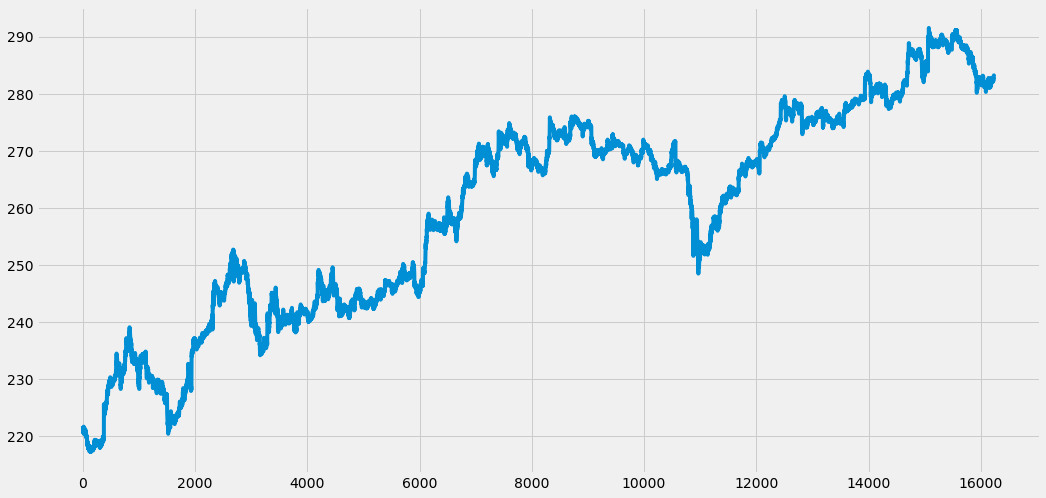

In [15]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.plot(df1)

In [18]:
import numpy as np

In [19]:
df1

,Close
0,221.80
1,221.70
2,220.90
3,221.35
4,220.70
...,...
16231,283.10
16232,283.15
16233,283.20
16234,283.10


In [20]:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [21]:
print(df1)

[[0.06127946]
 [0.05993266]
 [0.04915825]
 ...
 [0.88821549]
 [0.88686869]
 [0.88619529]]


In [33]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.81)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [34]:
training_size,test_size

(13151, 3085)

In [35]:
train_data

array([[0.06127946],
       [0.05993266],
       [0.04915825],
       ...,
       [0.796633  ],
       [0.7993266 ],
       [0.8020202 ]])

In [37]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   #i=0,1,2,3-----524,525 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [47]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 2000
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [48]:
print(X_train.shape), print(y_train.shape)

(11150, 2000)
(11150,)


(None, None)

In [49]:
print(X_test.shape), print(ytest.shape)

(1084, 2000)
(1084,)


(None, None)

In [50]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [121]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [122]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 260, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 260, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=80,batch_size=8,verbose=1)

In [25]:
#serilizin the model to json
from keras.models import model_from_json
model_json = model.to_json()
with open("model_lstm1.json","w") as json_file:
    json_file.write(model_json)
#serilizeing the model to HDF5    
model.save_weights("model_lstm1.h5")
json_file = open('model_lstm1.json','r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model_lstm1.h5")

#the above code helps to save time it loads the model into json file so we don't want to wait till the 40 epochs

    

NameError: name 'model' is not defined

In [26]:
json_file = open('model_lstm1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_lstm1.h5")
print("Loaded model from disk")

Loaded model from disk


In [27]:
import tensorflow as tf

In [29]:
train_predict=loaded_model.predict(X_train)
test_predict=loaded_model.predict(X_test)

In [30]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [31]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

253.96204348046842

In [32]:
math.sqrt(mean_squared_error(ytest,test_predict))

279.87971095227823

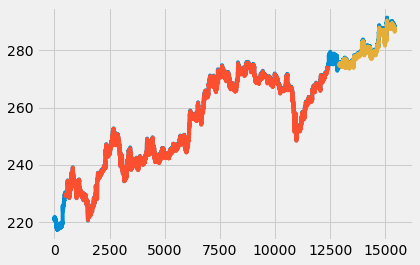

In [33]:
### Plotting 
# shift train predictions for plotting
look_back=525
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [34]:
len(test_data)

3098

In [57]:
x_input=test_data[2573:].reshape(1,-1)
x_input.shape


(1, 525)

In [36]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [37]:
temp_input

[0.8841750841750842,
 0.8855218855218858,
 0.8875420875420872,
 0.8855218855218858,
 0.8949494949494952,
 0.8942760942760941,
 0.901010101010101,
 0.8929292929292934,
 0.8996632996632998,
 0.8962962962962968,
 0.8989898989898992,
 0.9084175084175086,
 0.9003367003367009,
 0.9057239057239057,
 0.9003367003367009,
 0.8962962962962968,
 0.893602693602694,
 0.8942760942760941,
 0.8848484848484848,
 0.8801346801346805,
 0.8720538720538724,
 0.8754208754208754,
 0.8808080808080807,
 0.8821548821548824,
 0.8841750841750842,
 0.8922558922558923,
 0.8962962962962968,
 0.9016835016835016,
 0.9023569023569027,
 0.9090909090909092,
 0.9090909090909092,
 0.9063973063973068,
 0.9016835016835016,
 0.9016835016835016,
 0.8996632996632998,
 0.8989898989898992,
 0.8989898989898992,
 0.8915824915824917,
 0.8969696969696974,
 0.893602693602694,
 0.8909090909090907,
 0.8868686868686875,
 0.8888888888888888,
 0.893602693602694,
 0.8915824915824917,
 0.8942760942760941,
 0.8909090909090907,
 0.89292929292929

In [38]:
#  predicting for next day (in Minuties 525 )
from numpy import array

lst_output=[]
n_steps=525
i=0
while(i<10):
    
    if(len(temp_input)>n_steps):
        x_input=np.array(temp_input[1:])
        print("{} Min input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} Min output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

NameError: name 'model' is not defined

In [125]:
min_new=np.arange(1,526)
min_pred=np.arange(526,536)

In [126]:
a = min_pred,scaler.inverse_transform(lst_output)

In [127]:
a 

(array([526, 527, 528, 529, 530, 531, 532, 533, 534, 535]),
 array([[221.18208645],
        [221.18040332],
        [221.17872738],
        [221.17706472],
        [221.17541202],
        [221.17377177],
        [221.17214119],
        [221.17052113],
        [221.16891241],
        [221.16731337]]))

In [128]:
import matplotlib.pyplot as plt

In [129]:
len(df1)

15486

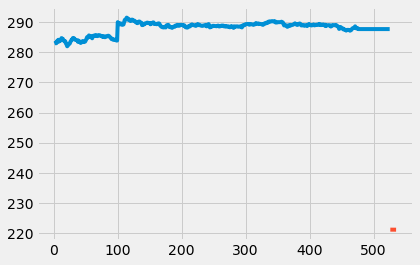

In [130]:
plt.plot(min_new,scaler.inverse_transform(df1[14961:]))
plt.plot(min_pred,scaler.inverse_transform(lst_output))

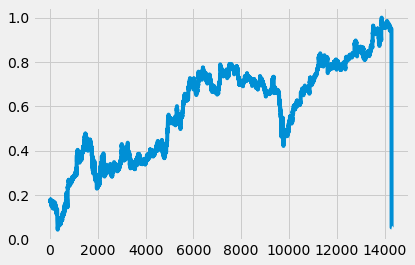

In [131]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])


In [132]:
df3=scaler.inverse_transform(df3).tolist()

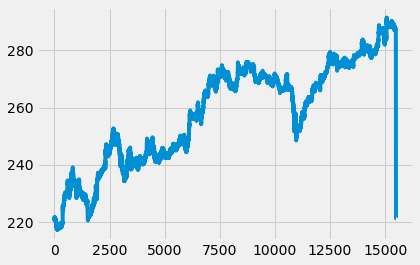

In [133]:
plt.plot(df3)

In [22]:
df5 = pd.read_csv('SBIN-EQ.csv')

In [23]:
df5.head()

,Date,SBIN-EQ O,SBIN-EQ H,SBIN-EQ L,SBIN-EQ C,SBIN-EQ V
0,1/11/2021 15:29,283.10,283.20,282.80,283.05,62812
1,1/11/2021 15:28,283.15,283.35,282.95,283.10,112867
2,1/11/2021 15:27,283.20,283.35,283.05,283.20,105989
3,1/11/2021 15:26,283.15,283.25,283.00,283.15,103970
4,1/11/2021 15:25,283.15,283.20,283.00,283.10,104628


In [48]:
df5.tail()

,Date,SBIN-EQ O,SBIN-EQ H,SBIN-EQ L,SBIN-EQ C,SBIN-EQ V
14680,11/13/2020 9:19,223.85,224.15,223.45,223.70,312757
14681,11/13/2020 9:18,224.10,224.10,223.80,223.95,431940
14682,11/13/2020 9:17,224.50,224.80,224.00,224.00,357257
14683,11/13/2020 9:16,224.05,224.70,223.90,224.55,596570
14684,11/13/2020 9:15,225.00,225.00,223.70,224.20,1137033


In [24]:
df5.shape  

(14685, 6)

In [46]:
Close4 = []
for i in df5['SBIN-EQ C'][::-1]:
    Close4.append(i)

In [49]:
Date4 = []
for date in df5['Date'][::-1]:
    Date4.append(date)

In [50]:
Close4[:8]

[224.2, 224.55, 224.0, 223.95, 223.7, 223.5, 223.25, 222.55]

In [53]:
data_frame = pd.DataFrame({'Date':Date4,'Close':Close4})

In [58]:
data_frame4 = pd.DataFrame({'Close':Close4})

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df4=scaler.fit_transform(np.array(data_frame4).reshape(-1,1))

In [70]:
prediction_data = df4[13000:]

In [71]:
len(prediction_data)

1685

In [74]:
x_input4=prediction_data[1160:].reshape(1,-1)
x_input4.shape


(1, 525)

In [76]:
temp_input4=list(x_input)
temp_input4=temp_input4[0].tolist()

In [78]:
lst_output4=[]
n_steps=525
i=0
while(i<525):
    
    if(len(temp_input4)>n_steps):
        x_input4=np.array(temp_input4[1:])
        print("{} Min input {}".format(i,x_input4))
        x_input4=x_input4.reshape(1,-1)
        x_input4 = x_input4.reshape((1, n_steps, 1))
        yhat4 = loaded_model.predict(x_input4, verbose=0)
        print("{} Min output {}".format(i,yhat4))
        temp_input4.extend(yhat4[0].tolist())
        temp_input4=temp_input[1:]
        lst_output4.extend(yhat4.tolist())
        i=i+1
    else:
        x_input4 = x_input4.reshape((1, n_steps,1))
        yhat4 = loaded_model.predict(x_input4, verbose=0)
        print(yhat4[0])
        temp_input4.extend(yhat4[0].tolist())
        print(len(temp_input4))
        lst_output4.extend(yhat4.tolist())
        i=i+1
    

print(lst_output4)

[0.8752239]
526
1 Min input [0.94581281 0.947924   0.95425757 0.95425757 0.95566502 0.95144265
 0.95144265 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519
 0.95073892 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265
 0.95214638 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757
 0.94862773 0.95425757 0.947924   0.94862773 0.95566502 0.95496129
 0.95707248 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892
 0.94933146 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924
 0.94018297 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654
 0.95073892 0.947924   0.94933146 0.94933146 0.947924   0.94722027
 0.94722027 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535
 0.94440535 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313
 0.94299789 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227
 0.9268121  0.92610837 0.92258973 0.91766362 0.91203378 0.91766362
 0.91907108 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481
 0.91836735 0.91977481 0.91907108 

4 Min output [[0.86568654]]
[0.86568654]
525
[0.86568654]
526
7 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481 

10 Min output [[0.85921806]]
[0.85921806]
525
[0.85921806]
526
13 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.9197748

 0.88106967 0.8566764  0.8566764 ]
16 Min output [[0.85450256]]
[0.85450256]
525
[0.85450256]
526
19 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.91484

22 Min output [[0.8510434]]
[0.8510434]
525
[0.8510434]
526
25 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481 0

28 Min output [[0.84849405]]
[0.84849405]
525
[0.84849405]
526
31 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.9197748

34 Min output [[0.8466093]]
[0.8466093]
525
[0.8466093]
526
37 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481 0

40 Min output [[0.84521174]]
[0.84521174]
525
[0.84521174]
526
43 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.9197748

46 Min output [[0.84417385]]
[0.84417385]
525
[0.84417385]
526
49 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.9197748

52 Min output [[0.8434018]]
[0.8434018]
525
[0.8434018]
526
55 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481 0

58 Min output [[0.8428273]]
[0.8428273]
525
[0.8428273]
526
61 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481 0

64 Min output [[0.8423992]]
[0.8423992]
525
[0.8423992]
526
67 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481 0

70 Min output [[0.84208006]]
[0.84208006]
525
[0.84208006]
526
73 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.9197748

76 Min output [[0.84184206]]
[0.84184206]
525
[0.84184206]
526
79 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.9197748

82 Min output [[0.8416646]]
[0.8416646]
525
[0.8416646]
526
85 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481 0

88 Min output [[0.84153235]]
[0.84153235]
525
[0.84153235]
526
91 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.9197748

94 Min output [[0.8414336]]
[0.8414336]
525
[0.8414336]
526
97 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481 0

100 Min output [[0.8413599]]
[0.8413599]
525
[0.8413599]
526
103 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

106 Min output [[0.8413047]]
[0.8413047]
525
[0.8413047]
526
109 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

112 Min output [[0.8412638]]
[0.8412638]
525
[0.8412638]
526
115 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

118 Min output [[0.841233]]
[0.841233]
525
[0.841233]
526
121 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481 0.

124 Min output [[0.84121007]]
[0.84121007]
525
[0.84121007]
526
127 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977

130 Min output [[0.841193]]
[0.841193]
525
[0.841193]
526
133 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481 0.

136 Min output [[0.84118026]]
[0.84118026]
525
[0.84118026]
526
139 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977

142 Min output [[0.8411705]]
[0.8411705]
525
[0.8411705]
526
145 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

148 Min output [[0.8411634]]
[0.8411634]
525
[0.8411634]
526
151 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

154 Min output [[0.84115815]]
[0.84115815]
525
[0.84115815]
526
157 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977

160 Min output [[0.8411545]]
[0.8411545]
525
[0.8411545]
526
163 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

166 Min output [[0.8411516]]
[0.8411516]
525
[0.8411516]
526
169 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

172 Min output [[0.8411496]]
[0.8411496]
525
[0.8411496]
526
175 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

[0.841148]
525
[0.841148]
526
181 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481 0.91836735
 0.91977481 0.91907

184 Min output [[0.8411463]]
[0.8411463]
525
[0.8411463]
526
187 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

 0.88106967 0.84114575 0.84114575]
190 Min output [[0.84114516]]
[0.84114516]
525
[0.84114516]
526
193 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.914

196 Min output [[0.84114444]]
[0.84114444]
525
[0.84114444]
526
199 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977

202 Min output [[0.8411437]]
[0.8411437]
525
[0.8411437]
526
205 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

208 Min output [[0.8411431]]
[0.8411431]
525
[0.8411431]
526
211 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

214 Min output [[0.84114295]]
[0.84114295]
525
[0.84114295]
526
217 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977

220 Min output [[0.8411427]]
[0.8411427]
525
[0.8411427]
526
223 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

[0.8411425]
525
[0.8411425]
526
229 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481 0.91836735
 0.91977481 0.919

232 Min output [[0.8411425]]
[0.8411425]
525
[0.8411425]
526
235 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

238 Min output [[0.8411425]]
[0.8411425]
525
[0.8411425]
526
241 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

244 Min output [[0.8411425]]
[0.8411425]
525
[0.8411425]
526
247 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

250 Min output [[0.8411425]]
[0.8411425]
525
[0.8411425]
526
253 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

[0.8411425]
525
[0.8411425]
526
259 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481 0.91836735
 0.91977481 0.919

[0.8411425]
525
[0.8411425]
526
265 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481 0.91836735
 0.91977481 0.919

268 Min output [[0.8411425]]
[0.8411425]
525
[0.8411425]
526
271 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

274 Min output [[0.8411425]]
[0.8411425]
525
[0.8411425]
526
277 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

280 Min output [[0.8411425]]
[0.8411425]
525
[0.8411425]
526
283 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

286 Min output [[0.8411425]]
[0.8411425]
525
[0.8411425]
526
289 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

292 Min output [[0.8411425]]
[0.8411425]
525
[0.8411425]
526
295 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

298 Min output [[0.8411425]]
[0.8411425]
525
[0.8411425]
526
301 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

[0.8411425]
525
[0.8411425]
526
307 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481 0.91836735
 0.91977481 0.919

[0.8411425]
525
[0.8411425]
526
313 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481 0.91836735
 0.91977481 0.919

316 Min output [[0.8411425]]
[0.8411425]
525
[0.8411425]
526
319 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

[0.8411425]
525
[0.8411425]
526
325 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481 0.91836735
 0.91977481 0.919

328 Min output [[0.8411425]]
[0.8411425]
525
[0.8411425]
526
331 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

334 Min output [[0.8411425]]
[0.8411425]
525
[0.8411425]
526
337 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

 0.88106967 0.84114254 0.84114254]
340 Min output [[0.8411425]]
[0.8411425]
525
[0.8411425]
526
343 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.914848

346 Min output [[0.8411425]]
[0.8411425]
525
[0.8411425]
526
349 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

[0.8411425]
525
[0.8411425]
526
355 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481 0.91836735
 0.91977481 0.919

358 Min output [[0.8411425]]
[0.8411425]
525
[0.8411425]
526
361 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

[0.8411425]
525
[0.8411425]
526
367 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481 0.91836735
 0.91977481 0.919

[0.8411425]
525
[0.8411425]
526
373 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481 0.91836735
 0.91977481 0.919

376 Min output [[0.8411425]]
[0.8411425]
525
[0.8411425]
526
379 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

 0.88106967 0.84114254 0.84114254]
382 Min output [[0.8411425]]
[0.8411425]
525
[0.8411425]
526
385 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.914848

[0.8411425]
525
[0.8411425]
526
391 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481 0.91836735
 0.91977481 0.919

[0.8411425]
525
[0.8411425]
526
397 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481 0.91836735
 0.91977481 0.919

400 Min output [[0.8411425]]
[0.8411425]
525
[0.8411425]
526
403 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

406 Min output [[0.8411425]]
[0.8411425]
525
[0.8411425]
526
409 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

412 Min output [[0.8411425]]
[0.8411425]
525
[0.8411425]
526
415 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

418 Min output [[0.8411425]]
[0.8411425]
525
[0.8411425]
526
421 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

424 Min output [[0.8411425]]
[0.8411425]
525
[0.8411425]
526
427 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

430 Min output [[0.8411425]]
[0.8411425]
525
[0.8411425]
526
433 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

436 Min output [[0.8411425]]
[0.8411425]
525
[0.8411425]
526
439 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

[0.8411425]
525
[0.8411425]
526
445 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481 0.91836735
 0.91977481 0.919

[0.8411425]
525
[0.8411425]
526
451 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481 0.91836735
 0.91977481 0.919

[0.8411425]
525
[0.8411425]
526
457 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481 0.91836735
 0.91977481 0.919

[0.8411425]
525
[0.8411425]
526
463 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481 0.91836735
 0.91977481 0.919

466 Min output [[0.8411425]]
[0.8411425]
525
[0.8411425]
526
469 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

472 Min output [[0.8411425]]
[0.8411425]
525
[0.8411425]
526
475 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

 0.88106967 0.84114254 0.84114254]
478 Min output [[0.8411425]]
[0.8411425]
525
[0.8411425]
526
481 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.914848

484 Min output [[0.8411425]]
[0.8411425]
525
[0.8411425]
526
487 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

 0.88106967 0.84114254 0.84114254]
490 Min output [[0.8411425]]
[0.8411425]
525
[0.8411425]
526
493 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.914848

496 Min output [[0.8411425]]
[0.8411425]
525
[0.8411425]
526
499 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

502 Min output [[0.8411425]]
[0.8411425]
525
[0.8411425]
526
505 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

508 Min output [[0.8411425]]
[0.8411425]
525
[0.8411425]
526
511 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481

[0.8411425]
525
[0.8411425]
526
517 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481 0.91836735
 0.91977481 0.919

[0.8411425]
525
[0.8411425]
526
523 Min input [0.947924   0.95425757 0.95425757 0.95566502 0.95144265 0.95144265
 0.95073892 0.95214638 0.94933146 0.94933146 0.95003519 0.95073892
 0.95003519 0.95073892 0.94651654 0.95003519 0.95144265 0.95214638
 0.95285011 0.95214638 0.95285011 0.95355384 0.95425757 0.94862773
 0.95425757 0.947924   0.94862773 0.95566502 0.95496129 0.95707248
 0.95636875 0.95496129 0.94933146 0.94862773 0.95073892 0.94933146
 0.94933146 0.93877551 0.94229416 0.93947924 0.93947924 0.94018297
 0.94370162 0.94651654 0.94440535 0.94370162 0.94651654 0.95073892
 0.947924   0.94933146 0.94933146 0.947924   0.94722027 0.94722027
 0.94862773 0.94862773 0.94862773 0.94651654 0.94440535 0.94440535
 0.94510908 0.94299789 0.94229416 0.9408867  0.93455313 0.94299789
 0.93666432 0.9408867  0.92821956 0.92399719 0.92118227 0.9268121
 0.92610837 0.92258973 0.91766362 0.91203378 0.91766362 0.91907108
 0.91555243 0.9148487  0.91555243 0.91555243 0.91977481 0.91836735
 0.91977481 0.919

In [79]:
min_new4=np.arange(1,526)
min_pred4=np.arange(526,1051)

In [89]:
a4 = zip(min_pred4,scaler.inverse_transform(lst_output4))

In [90]:
a4 = list(a4)

In [92]:
len(a4)

525

In [91]:
a4

[(526, array([282.63465632])),
 (527, array([282.24883485])),
 (528, array([282.24883485])),
 (529, array([282.24883485])),
 (530, array([281.95702837])),
 (531, array([281.95702837])),
 (532, array([281.95702837])),
 (533, array([281.70890923])),
 (534, array([281.70890923])),
 (535, array([281.70890923])),
 (536, array([281.49744323])),
 (537, array([281.49744323])),
 (538, array([281.49744323])),
 (539, array([281.3168582])),
 (540, array([281.3168582])),
 (541, array([281.3168582])),
 (542, array([281.1624068])),
 (543, array([281.1624068])),
 (544, array([281.1624068])),
 (545, array([281.03010821])),
 (546, array([281.03010821])),
 (547, array([281.03010821])),
 (548, array([280.91663379])),
 (549, array([280.91663379])),
 (550, array([280.91663379])),
 (551, array([280.81921392])),
 (552, array([280.81921392])),
 (553, array([280.81921392])),
 (554, array([280.73550246])),
 (555, array([280.73550246])),
 (556, array([280.73550246])),
 (557, array([280.66353016])),
 (558, array([